In [1]:
# import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
import numpy as np

In [2]:
# import dataset
from tensorflow.keras.datasets import boston_housing

In [3]:
# adding in sql lite
import sqlite3

In [13]:
# create a connection to database
conn = sqlite3.connect('boston_housing.db')

In [14]:
# execute query 
query = 'SELECT name FROM sqlite_master WHERE type="table";'
table_names_df = pd.read_sql_query(query, conn)


In [15]:
# print table names 
print(table_names_df['name'])

Series([], Name: name, dtype: object)


In [16]:
# close connection
conn.close()

In [4]:
# load the data 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [36]:
# The Boston Housing dataset contains information about housing 
# prices in the Boston area. It includes features such as crime rate, 
# average number of rooms per dwelling, and more. 

In [5]:
# import libraries 
from sklearn.model_selection import train_test_split

In [6]:
# split the data into 80% training and 20% test 
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets, test_size=0.2, random_state=42)

In [7]:
# print the shapes of the resulting datasets. 
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Test targets shape: {y_test.shape}")

Training data shape: (323, 13)
Test data shape: (81, 13)
Training targets shape: (323,)
Test targets shape: (81,)


In [40]:
# training data shape describes the number of samples (data points) and the number
# of features (variables) in the training dataset. 
# we have 323 houses and 13 features for each house in this dataset. 

In [41]:
# test data shape 
# refers to the dimensions or structure of the dataset used for evaluating
# the performance of a machine learning model. 
# we have 81 samples (houses) and 13 features (variables) 
# the 13 features are represented as columns in a tabular dataset. 

In [8]:
# import 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# create a sequential model 
model = Sequential()

In [9]:
# add layers to the model 
model.add(Dense(units=64, activation='relu', input_shape=(13,))) # input layer # 13 because data has 13 features
model.add(Dense(units=32, activation='relu')) # hidden layer
model.add(Dense(units=1)) # output layer # chose 1 because performing regression # no activation function because its a regression task

In [10]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# optimizer = adam 
# loss function is the mean squared error (MSE). this measures the average
# squared difference between the predicted values and the actual target values
# metrics = MAE which stands for mean absolute error. MAE represents the 
# average absolute difference between predicted and actual values. 

In [11]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# the model is a sequential neural network. 
# total parameters: 3009
# non-trainable parameters: 0 

In [12]:
# train the model using the training data 
# epoch (iterations) = 300
# batch size = 32 
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2,
                    verbose=1)

# evaluate the model on the test data
# test_loss represents the mean squared error on the test set 
# test_mae represents the mean absolute error on the test set 
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/300


9/9 [==============================] - 2s 50ms/step - loss: 1253.9044 - mae: 26.1410 - val_loss: 630.6826 - val_mae: 23.8248
Epoch 2/300
9/9 [==============================] - 0s 16ms/step - loss: 304.2114 - mae: 15.0940 - val_loss: 149.3825 - val_mae: 8.6906
Epoch 3/300
9/9 [==============================] - 0s 11ms/step - loss: 129.5130 - mae: 8.4222 - val_loss: 125.5670 - val_mae: 8.0915
Epoch 4/300
9/9 [==============================] - 0s 14ms/step - loss: 85.9681 - mae: 7.0324 - val_loss: 88.3697 - val_mae: 6.6949
Epoch 5/300
9/9 [==============================] - 0s 13ms/step - loss: 68.0419 - mae: 5.7232 - val_loss: 76.3124 - val_mae: 5.8027
Epoch 6/300
9/9 [==============================] - 0s 11ms/step - loss: 65.8714 - mae: 5.7216 - val_loss: 73.5146 - val_mae: 6.1987
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 64.5573 - mae: 5.9795 - val_loss: 74.1099 - val_mae: 5.6066
Epoch 8/300
9/9 [==============================] - 0s 12ms/step 

In [13]:
# print results 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 30.7602
Test Mean Absolute Error (MAE): 3.9664


In [14]:
# how well did the model perform? 
# test loss: 20.3024
# test mean absolute error: 3.1967
# a lower test loss and MAE indicate better performance. 

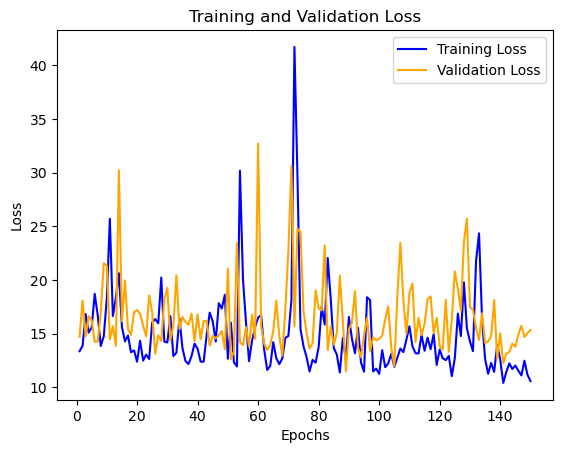

AttributeError: 'NoneType' object has no attribute 'savefig'

In [33]:
# plot loss curve during training (loss at the end of each epoch or iteration)
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

# plot training loss
plt.plot(epochs, loss_values, label='Training Loss', color='blue')

# plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# graph demonstrates 

# training loss curve - the blue line represents the training loss (mean squared error) over epochs
# as the number of training epochs increases, the training loss decreases 
# this indicates that the model is learning and improving its predictions on the training data 

# validation loss curve -  the orange line represents the validation loss (mean squared error) over epochs
# if the validation loss starts increasing signifcantly, it suggests overfitting 

# ideally training and validation loss decrease steadily 


In [27]:
# train the model using the training data 
# epoch (iterations) = 150
# batch size = 32 
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2,
                    verbose=1)

# evaluate the model on the test data
# test_loss represents the mean squared error on the test set 
# test_mae represents the mean absolute error on the test set 
test_loss, test_mae = model.evaluate(X_test, y_test)

Epoch 1/150
9/9 [==============================] - 0s 19ms/step - loss: 13.3678 - mae: 2.7246 - val_loss: 14.7158 - val_mae: 2.8641
Epoch 2/150
9/9 [==============================] - 0s 11ms/step - loss: 13.8878 - mae: 2.7829 - val_loss: 18.0967 - val_mae: 3.2988
Epoch 3/150
9/9 [==============================] - 0s 10ms/step - loss: 16.8321 - mae: 3.1975 - val_loss: 14.7691 - val_mae: 2.8409
Epoch 4/150
9/9 [==============================] - 0s 12ms/step - loss: 15.1041 - mae: 2.9271 - val_loss: 16.6374 - val_mae: 3.0675
Epoch 5/150
9/9 [==============================] - 0s 12ms/step - loss: 15.5735 - mae: 3.0807 - val_loss: 16.2437 - val_mae: 2.8812
Epoch 6/150
9/9 [==============================] - 0s 10ms/step - loss: 18.7079 - mae: 3.3615 - val_loss: 14.2544 - val_mae: 2.8357
Epoch 7/150
9/9 [==============================] - 0s 9ms/step - loss: 16.7187 - mae: 3.0877 - val_loss: 14.2678 - val_mae: 2.8837
Epoch 8/150
9/9 [==============================] - 0s 10ms/step - loss: 13.84

In [28]:
# print results 
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

Test Loss: 24.0910
Test Mean Absolute Error (MAE): 3.2832


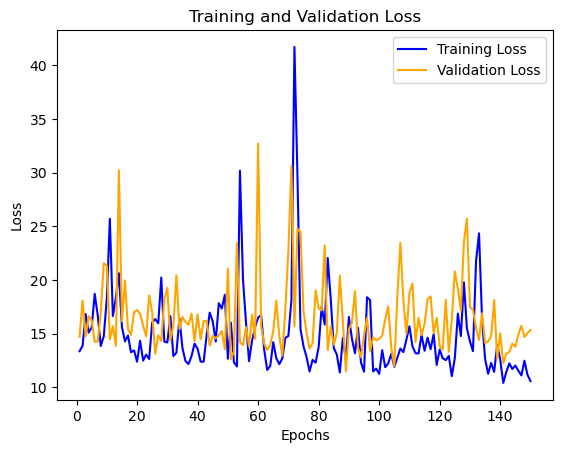

<Figure size 640x480 with 0 Axes>

In [30]:
# plot loss curve during training (loss at the end of each epoch or iteration)
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

# plot training loss
plt.plot(epochs, loss_values, label='Training Loss', color='blue')

# plot validation loss
plt.plot(epochs, val_loss_values, label='Validation Loss', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
